In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
import seaborn as sns
#from IPython.display import Image
#import matplotlib.pyplot as plt
#import pydotplus

In [3]:
def get_data(week_nums):
    # base url
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        # concat our week onto url..
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170422, 170429, 170506, 170513]
# Test against Julia's nums
# week_nums = [160903, 160910, 160917]
df = get_data(week_nums)

In [4]:
df.columns = [column.strip() for column in df.columns]

In [5]:
df.columns.tolist()

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS']

In [6]:
# df.DATE.value_counts().sort_index()

In [7]:
df['KEY'] = df['C/A'] + ',' + df['UNIT'] + ',' + df['SCP'] + ',' + df['STATION']

In [8]:
df.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
KEY         object
dtype: object

In [9]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'],format="%m/%d/%Y %H:%M:%S")

In [10]:
df.DATETIME.head()

0   2017-04-15 00:00:00
1   2017-04-15 04:00:00
2   2017-04-15 08:00:00
3   2017-04-15 12:00:00
4   2017-04-15 16:00:00
Name: DATETIME, dtype: datetime64[ns]

In [11]:
df.shape

(789772, 13)

In [12]:
df.DESC.value_counts()

REGULAR       786722
RECOVR AUD      3050
Name: DESC, dtype: int64

In [13]:
(df
 .groupby(["KEY", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,KEY,DATETIME,ENTRIES
109331,"G001,R151,00-00-00,CONEY IS-STILLW",2017-05-09 05:00:00,2
323055,"N329,R201,00-00-00,WOODHAVEN BLVD",2017-04-28 05:00:00,2
0,"A002,R051,02-00-00,59 ST",2017-04-15 00:00:00,1
526517,"R145,R032,00-00-02,TIMES SQ-42 ST",2017-04-20 08:00:00,1
526508,"R145,R032,00-00-02,TIMES SQ-42 ST",2017-04-18 20:00:00,1


In [14]:
# Explore the duplicate entries on 5/9
# mask = ((df["C/A"] == "G001") & 
# (df["UNIT"] == "R151") & 
# (df["SCP"] == "00-00-00") & 
# (df["STATION"] == "CONEY IS-STILLW") &
# # get datetime properties ~ .dt
# (df["DATETIME"].dt.date == datetime.datetime(2017, 5, 9).date()))
# df[mask].head()

In [15]:
# Explore the duplicate entries on 4/28
# mask = ((df["C/A"] == "N329") & 
# (df["UNIT"] == "R201") & 
# (df["SCP"] == "00-00-00") & 
# (df["STATION"] == "WOODHAVEN BLVD") &
# # get datetime properties ~ .dt
# (df["DATETIME"].dt.date == datetime.datetime(2017, 4, 28).date()))
# df[mask].head()

In [16]:
# df.sort_values(["KEY", "DATETIME"], inplace=True,
#               ascending = True)

In [17]:
df.drop_duplicates(subset=["KEY", "DATETIME"], inplace=True)

In [18]:
df.shape # two duplicates were removed

(789770, 13)

In [19]:
df.sort_values(["KEY", "DATETIME"], inplace=True, ascending=True)

In [20]:
# stationMax = df.groupby("STATION").ENTRIES.max()
# stationMax.sort_values(ascending=False)

In [21]:
# df.sort_values(["KEY",'DATETIME'],inplace=True)

In [22]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,KEY,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,00:00:00,REGULAR,6136580,2078941,"A002,R051,02-00-00,59 ST",2017-04-15 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,04:00:00,REGULAR,6136613,2078947,"A002,R051,02-00-00,59 ST",2017-04-15 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,08:00:00,REGULAR,6136639,2078987,"A002,R051,02-00-00,59 ST",2017-04-15 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,12:00:00,REGULAR,6136799,2079109,"A002,R051,02-00-00,59 ST",2017-04-15 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,16:00:00,REGULAR,6137076,2079173,"A002,R051,02-00-00,59 ST",2017-04-15 16:00:00


In [23]:
df['ENTRYCOUNT'] = df.groupby("KEY")['ENTRIES'].diff()

In [24]:
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

df2 = df.copy()

In [25]:
df.sort_values('ENTRYCOUNT', ascending=False).head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,KEY,DATETIME,ENTRYCOUNT
22446,C021,R212,00-00-02,59 ST,NRW,BMT,04/21/2017,08:00:00,2031090592,"C021,R212,00-00-02,59 ST",2017-04-21 08:00:00,2.020572e+09
195481,R730,R431,00-00-04,EASTCHSTER/DYRE,5,IRT,05/05/2017,09:00:00,1560221483,"R730,R431,00-00-04,EASTCHSTER/DYRE",2017-05-05 09:00:00,1.557696e+09
135682,R161B,R452,00-00-03,72 ST,123,IRT,04/30/2017,13:00:00,691260128,"R161B,R452,00-00-03,72 ST",2017-04-30 13:00:00,6.831548e+08
153362,R241A,R048,00-00-00,GRD CNTRL-42 ST,4567S,IRT,05/04/2017,13:00:00,503289886,"R241A,R048,00-00-00,GRD CNTRL-42 ST",2017-05-04 13:00:00,4.884515e+08
103128,N550,R242,01-05-00,18 AV,F,IND,04/24/2017,16:00:00,117440513,"N550,R242,01-05-00,18 AV",2017-04-24 16:00:00,1.174379e+08
23499,C026,R215,01-06-01,86 ST,R,BMT,04/18/2017,16:00:00,117484688,"C026,R215,01-06-01,86 ST",2017-04-18 16:00:00,1.170130e+08
150431,R228,R143,00-00-04,28 ST,6,IRT,04/26/2017,17:00:00,100710462,"R228,R143,00-00-04,28 ST",2017-04-26 17:00:00,1.003657e+08
166407,R311,R053,00-05-00,3 AV-149 ST,25,IRT,04/28/2017,16:00:00,67108864,"R311,R053,00-05-00,3 AV-149 ST",2017-04-28 16:00:00,6.710797e+07
16380,B022,R229,00-05-00,AVENUE M,BQ,BMT,04/30/2017,12:00:00,16796105,"B022,R229,00-05-00,AVENUE M",2017-04-30 12:00:00,1.673498e+07
16085,B022,R229,00-00-00,AVENUE M,BQ,BMT,04/30/2017,11:00:00,16796105,"B022,R229,00-00-00,AVENUE M",2017-04-30 11:00:00,1.600624e+07


In [26]:
#df["ABSENTRY"] = df.ENTRYCOUNT.abs()

In [27]:
#df.ABSENTRY.isnull

In [28]:
sum(abs(df.ENTRYCOUNT) > 10000)/len(df)

7.5971485369158109e-05

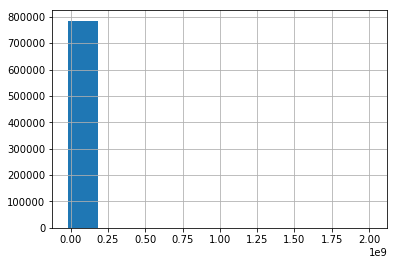

In [29]:
df.ENTRYCOUNT.hist()

In [30]:
# df = df.drop(['EXITS','DESC'],axis=1,errors='ignore')
# df2 = df.copy()

In [31]:
def clean_entries(row, max_counter):
    each = row["ENTRYCOUNT"]
    if each < 0:
        each = -each
    elif each > max_counter:
        return 0
    return each

df2['ENTRYCOUNT'] = df2.apply(clean_entries, axis=1, max_counter=1000)

In [32]:
df2StationMax = df2.groupby(['KEY','DATETIME']).ENTRYCOUNT.max()
df2StationMax.sort_values(ascending=False)

KEY                                 DATETIME           
R240,R047,00-00-01,GRD CNTRL-42 ST  2017-05-04 17:00:00    20235064.0
B022,R229,00-05-00,AVENUE M         2017-05-01 12:00:00    16796155.0
R162,R166,00-00-00,79 ST            2017-04-25 17:00:00    16660609.0
B022,R229,00-00-00,AVENUE M         2017-04-30 12:00:00    16006163.0
H037,R349,00-00-00,SUTTER AV        2017-05-01 13:00:00    11823138.0
N070,R012,04-00-03,34 ST-PENN STA   2017-04-19 16:00:00     9415811.0
J024,R437,00-00-00,CRESCENT ST      2017-05-02 09:00:00     7896928.0
B029,R172,00-00-01,BRIGHTON BEACH   2017-04-17 08:00:00     6924152.0
N068,R012,03-06-00,34 ST-PENN STA   2017-04-20 12:48:17     6314273.0
R165,R167,01-00-02,86 ST            2017-04-30 17:00:00     5961877.0
N063,R011,02-00-00,42 ST-PORT AUTH  2017-05-05 08:00:00     5439156.0
N319,R298,01-06-01,NORTHERN BLVD    2017-05-02 17:00:00     1946546.0
R158,R084,00-06-02,59 ST COLUMBUS   2017-04-28 12:00:00     1558767.0
PTH03,R552,00-00-02,JOURNAL SQUARE

In [33]:
# diffStationMin = df.groupby("STATION").ENTRYCOUNT.min()
# diffStationMin.sort_values(ascending=True)

In [34]:
# stationMax = df.groupby("STATION").ENTRYCOUNT.max()
# stationMax.sort_values(ascending=False)

In [35]:
stationDF = df2.groupby(["STATION"]).ENTRYCOUNT.sum().reset_index()
stationDF.sort_values('ENTRYCOUNT',ascending=False,inplace=True)

In [36]:
stationDF.head(20)

,STATION,ENTRYCOUNT
129,AVENUE M,32950369.0
232,GRD CNTRL-42 ST,22093477.0
61,34 ST-PENN STA,18881239.0
102,79 ST,17578855.0
346,SUTTER AV,11918055.0
194,CRESCENT ST,8015495.0
109,86 ST,7886104.0
68,42 ST-PORT AUTH,7583729.0
160,BRIGHTON BEACH,7245161.0
85,59 ST COLUMBUS,2870209.0


In [37]:
stationDF.to_csv("stations.csv",index_label="Index")

In [38]:
top100 = stationDF[:100]

In [39]:
len(top100)

100

In [40]:
top100.head()

,STATION,ENTRYCOUNT
129,AVENUE M,32950369.0
232,GRD CNTRL-42 ST,22093477.0
61,34 ST-PENN STA,18881239.0
102,79 ST,17578855.0
346,SUTTER AV,11918055.0


In [41]:
len(stationDF)

374

In [42]:
mid = stationDF[int(len(stationDF)/2):int((len(stationDF)/2)+5)]

In [43]:
mid.head()

,STATION,ENTRYCOUNT
150,BEDFORD-NOSTRAN,223224.0
91,67 AV,221756.0
283,MOSHOLU PKWY,220432.0
66,40 ST LOWERY ST,219738.0
70,46 ST,219596.0


In [44]:
# Replace Days with Name Days
df2['DAY']= df2.DATETIME.dt.dayofweek

In [45]:
df2.DAY.value_counts()

0    113585
3    113363
1    113181
2    113051
5    112397
6    112264
4    111929
Name: DAY, dtype: int64

In [46]:
df2['NAMEDAY']=df2.DAY.replace({0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday',
                       4:'Thursday', 5:'Friday', 6:'Saturday'})

In [47]:
df2.ENTRYCOUNT.isnull().sum()

4699

In [48]:
df2['HOUR']= df2.DATETIME.dt.hour

In [49]:
# Drop Null Values
df2.dropna(subset=["ENTRYCOUNT"], axis=0, inplace=True)

In [50]:
stationDF = df2.groupby(["STATION"]).ENTRYCOUNT.sum().reset_index()
stationDF.sort_values('ENTRYCOUNT',ascending=False,inplace=True)

In [51]:
stationDF.head()

,STATION,ENTRYCOUNT
129,AVENUE M,32950369.0
232,GRD CNTRL-42 ST,22093477.0
61,34 ST-PENN STA,18881239.0
102,79 ST,17578855.0
346,SUTTER AV,11918055.0


## Plotting Penn Station

In [52]:
top5 = stationDF[:5]

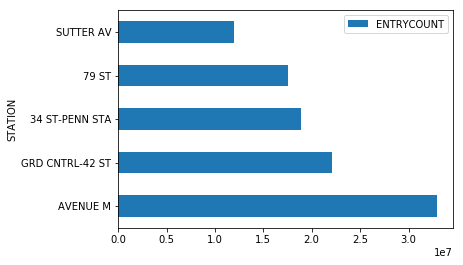

In [53]:
top5.plot(kind='barh',x='STATION')

In [54]:
pennDF = df2.loc[df2.STATION == '34 ST-PENN STA']

In [55]:
pennDF.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,KEY,DATETIME,ENTRYCOUNT,DAY,NAMEDAY,HOUR
50417,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,04:00:00,1803492,"N067,R012,00-00-00,34 ST-PENN STA",2017-04-15 04:00:00,1.0,5,Friday,4
50418,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,08:00:00,1803497,"N067,R012,00-00-00,34 ST-PENN STA",2017-04-15 08:00:00,5.0,5,Friday,8
50419,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,12:00:00,1803540,"N067,R012,00-00-00,34 ST-PENN STA",2017-04-15 12:00:00,43.0,5,Friday,12
50420,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,16:00:00,1803584,"N067,R012,00-00-00,34 ST-PENN STA",2017-04-15 16:00:00,44.0,5,Friday,16
50421,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/15/2017,20:00:00,1803606,"N067,R012,00-00-00,34 ST-PENN STA",2017-04-15 20:00:00,22.0,5,Friday,20


In [56]:
pennDayGroup = pennDF.groupby('DAY').ENTRYCOUNT.sum()
pennDayGroup

DAY
0     498342.0
1     498285.0
2    9946762.0
3    6812631.0
4     492979.0
5     333315.0
6     298925.0
Name: ENTRYCOUNT, dtype: float64

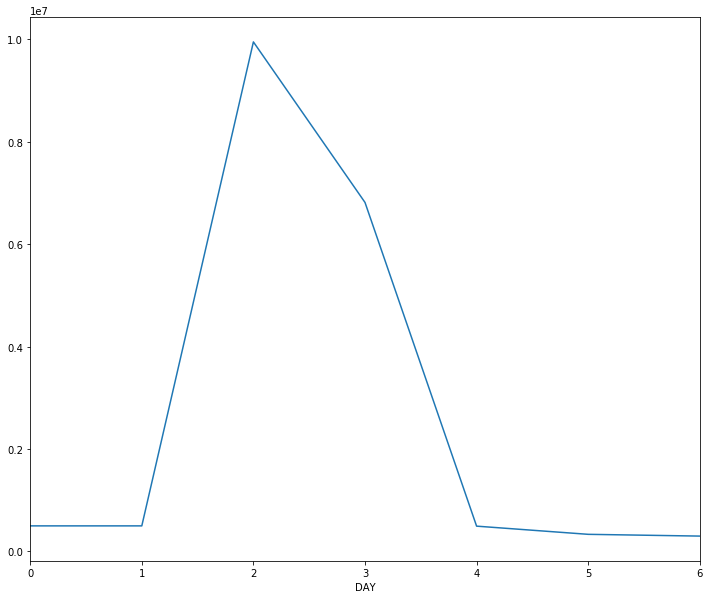

In [57]:
pennDayGroup.plot(kind='line',figsize=(12,10))

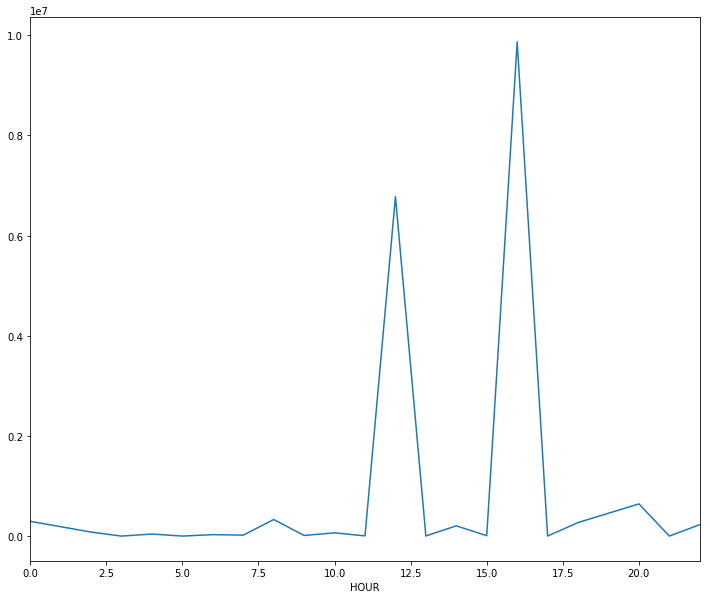

In [59]:
pennHourGroup = pennDF.groupby('HOUR').ENTRYCOUNT.sum()
pennHourGroup.plot(kind='line', figsize=(12,10))

In [96]:
pennHourGroup

HOUR
0      295404.0
2       79979.0
3         128.0
4       41169.0
5         298.0
6       29006.0
7       18962.0
8      330927.0
9       12535.0
10      64612.0
11       4231.0
12    6777832.0
13       2716.0
14     205144.0
15       7403.0
16    9867866.0
17       1185.0
18     270345.0
20     642817.0
21         19.0
22     228661.0
Name: ENTRYCOUNT, dtype: float64

In [97]:
pennDF.DATETIME.value_counts()

2017-04-16 00:00:00    77
2017-05-06 20:00:00    77
2017-05-10 04:00:00    77
2017-04-26 04:00:00    77
2017-04-23 20:00:00    77
2017-04-15 16:00:00    77
2017-04-27 16:00:00    77
2017-05-12 12:00:00    77
2017-04-22 04:00:00    77
2017-05-06 00:00:00    77
2017-05-05 04:00:00    77
2017-04-16 08:00:00    77
2017-05-12 04:00:00    77
2017-04-27 00:00:00    77
2017-04-16 12:00:00    77
2017-05-09 08:00:00    77
2017-04-25 08:00:00    77
2017-04-24 12:00:00    77
2017-04-26 08:00:00    77
2017-05-10 00:00:00    77
2017-05-09 04:00:00    77
2017-04-27 04:00:00    77
2017-04-22 00:00:00    77
2017-04-24 04:00:00    77
2017-05-05 16:00:00    77
2017-04-27 08:00:00    77
2017-04-25 20:00:00    77
2017-04-22 16:00:00    77
2017-04-16 04:00:00    77
2017-04-24 20:00:00    77
                       ..
2017-04-26 12:52:43    14
2017-04-25 05:11:26    14
2017-05-10 13:22:07    11
2017-04-23 15:48:07    11
2017-05-10 13:20:42    11
2017-04-23 15:46:53    11
2017-04-21 09:42:59    11
2017-04-23 1

## Challenge 5

In [84]:
turnstiles = df2.groupby(['C/A', 'UNIT', 'STATION','DATE']).ENTRYCOUNT.sum().reset_index()

In [85]:
type(turnstiles)

pandas.core.frame.DataFrame

In [86]:
turnstiles.head()

,C/A,UNIT,STATION,DATE,ENTRYCOUNT
0,A002,R051,59 ST,04/15/2017,7487.0
1,A002,R051,59 ST,04/16/2017,6951.0
2,A002,R051,59 ST,04/17/2017,12839.0
3,A002,R051,59 ST,04/18/2017,14583.0
4,A002,R051,59 ST,04/19/2017,14975.0


## Challenge 6

In [87]:
station = df.groupby(['STATION','DATE']).ENTRYCOUNT.sum().reset_index()

In [88]:
station.head()

,STATION,DATE,ENTRYCOUNT
0,1 AV,04/15/2017,11837.0
1,1 AV,04/16/2017,11716.0
2,1 AV,04/17/2017,17238.0
3,1 AV,04/18/2017,19657.0
4,1 AV,04/19/2017,22889.0


In [89]:
station1 = station.loc[station.STATION == '1 AV']

In [90]:
type(station1)

pandas.core.frame.DataFrame

In [91]:
# firstAveGroup = station.groupby('DATE')

In [92]:
# firstAveGroup.plot(x=firstAveGroup.indices,y='ENTRYCOUNT')

## Challenge 7

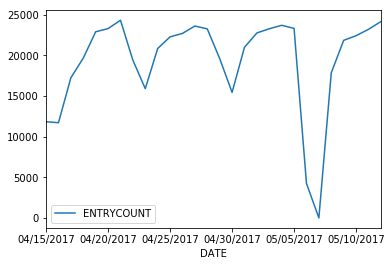

In [93]:
station1.plot(y='ENTRYCOUNT',x='DATE')

## Top 5 Stations based on Entries

In [105]:
top5stations = df.groupby('STATION').ENTRYCOUNT.sum().reset_index()

In [106]:
#top5stations = top5stations.sort_values('ENTRYCOUNT',ascending=False)

In [108]:
top5stations.loc[top5stations.STATION == 'EASTCHSTER/DYRE']

,STATION,ENTRYCOUNT
207,EASTCHSTER/DYRE,1.557721e+09


In [109]:
df.loc[df.STATION == 'EASTCHSTER/DYRE']

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,KEY,DATETIME,DAY,ENTRYCOUNT
195279,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,01:00:00,REGULAR,1334708,2553276,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 01:00:00,5,NaN
195280,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,05:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 05:00:00,5,0.000000e+00
195281,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,09:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 09:00:00,5,0.000000e+00
195282,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,13:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 13:00:00,5,0.000000e+00
195283,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,17:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 17:00:00,5,0.000000e+00
195284,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-29,21:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-29 21:00:00,5,0.000000e+00
195285,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-30,01:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-30 01:00:00,6,0.000000e+00
195286,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-30,05:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-30 05:00:00,6,0.000000e+00
195287,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-30,09:00:00,REGULAR,1334708,2553279,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-30 09:00:00,6,0.000000e+00
195288,R730,R431,00-00-00,EASTCHSTER/DYRE,5,IRT,2017-04-30,13:00:00,REGULAR,1334708,2553280,"R730,R431,00-00-00,EASTCHSTER/DYRE",2017-04-30 13:00:00,6,0.000000e+00


In [34]:
df.ENTRYCOUNT.min()

-20235064.0

In [ ]:
# Replace Days with Name Days
##titanic.sex=titanic.sex.replace({'female':0,'male':1})